<a href="https://colab.research.google.com/github/stav-aizik/AI-PROJECT/blob/main/Finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import libraries and download data


In [802]:
!pip install tensorflow.keras

In [803]:
#import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import tensorflow as tf
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN , Dense , LSTM ,Dropout , GRU ,Flatten ,Bidirectional
from tensorflow.keras.callbacks import EarlyStopping , ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam, RMSprop,SGD
from statsmodels.tsa.seasonal import seasonal_decompose

In [804]:
#download data(tesla) from yahoo Finance
tsla = yf.download("TSLA",start="2022-07-01",end="2023-07-01")

[*********************100%***********************]  1 of 1 completed


In [805]:
tsla.columns = [col[0] for col in tsla.columns]

In [806]:
tsla

,Close,High,Low,Open,Volume
Date,,,,,
2022-07-01,227.263336,230.229996,222.119995,227.000000,74460300
2022-07-05,233.066666,233.146667,216.166672,223.000000,84581100
2022-07-06,231.733337,234.563339,227.186661,230.779999,71853600
2022-07-07,244.543335,245.363327,232.210007,233.919998,81930600
2022-07-08,250.763336,254.979996,241.160004,242.333328,101854200
...,...,...,...,...,...
2023-06-26,241.050003,258.369995,240.699997,250.070007,179990600
2023-06-27,250.210007,250.389999,240.850006,243.240005,164968200
2023-06-28,256.239990,259.880005,248.889999,249.699997,159770800


In [807]:
tsla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-07-01 to 2023-06-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   251 non-null    float64
 1   High    251 non-null    float64
 2   Low     251 non-null    float64
 3   Open    251 non-null    float64
 4   Volume  251 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


#Statistical Data

In [808]:
#describe
tsla.describe()

,Close,High,Low,Open,Volume
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,211.215976,215.969721,206.114900,211.138260,1.225730e+08
std,51.796179,52.493955,51.133946,51.788649,4.996973e+07
min,108.099998,111.750000,101.809998,103.000000,4.186470e+07
25%,178.474998,182.419998,172.504997,176.635002,8.141040e+07
50%,197.580002,203.000000,192.889999,198.539993,1.163124e+08
75%,250.486671,257.934998,244.036667,250.295006,1.591312e+08
max,309.320007,314.666656,305.579987,311.666656,3.065906e+08


statistical by months:

In [809]:
tsla['month']=tsla.index.to_period('M')

In [810]:
group_month = tsla.groupby('month')

In [811]:
group_month.mean()

,Close,High,Low,Open,Volume
month,,,,,
2022-07,251.394666,255.841666,243.754666,248.886668,8.724420e+07
2022-08,294.869857,301.852028,290.238551,297.223042,7.370710e+07
2022-09,288.734763,294.027140,282.823809,287.885710,6.187005e+07
2022-10,223.810477,229.788573,217.481905,224.126190,8.263158e+07
2022-11,191.246666,197.352381,186.915238,193.479049,8.977501e+07
2022-12,152.970476,158.921428,150.161429,155.897143,1.402023e+08
2023-01,134.195999,137.242999,128.430500,132.316000,1.948750e+08
2023-02,199.775264,204.234737,193.332105,198.178420,1.907813e+08
2023-03,188.522609,192.462608,184.242608,188.425218,1.439835e+08


In [812]:
group_month.describe()

Close                                                             \
        count        mean        std         min         25%         50%   
month                                                                      
2022-07  20.0  251.394666  19.678442  227.263336  236.365829  245.036667   
2022-08  23.0  294.869857   9.581290  275.609985  288.130005  296.453339   
2022-09  21.0  288.734763  14.185170  265.250000  276.010010  288.589996   
2022-10  21.0  223.810477  11.287726  204.990005  217.240005  222.419998   
2022-11  21.0  191.246666  15.048549  167.869995  182.860001  190.720001   
2022-12  21.0  152.970476  26.916506  109.099998  125.349998  156.800003   
2023-01  20.0  134.195999  21.124977  108.099998  119.539997  127.974998   
2023-02  19.0  199.775264   8.123897  181.410004  195.784996  200.860001   
2023-03  23.0  188.522609   9.031799  172.919998  182.625000  190.410004   
2023-04  19.0  176.955262  12.843392  153.750000  163.650002  184.309998   
2023-05  22.0  175.799090  12.782245  160.309998  166.885002  171.934998   
2023-06  21.0  246.090476  18.824589  207.520004  234.860001  255.899994   

                                 High              ...        Open  \
                75%         max count        mean  ...         75%   
month                                              ...               
2022-07  269.251656  297.149994  20.0  255.841666  ...  264.485832   
2022-08  301.728333  309.320007  23.0  301.852028  ...  302.514999   
2022-09  302.609985  309.070007  21.0  294.027140  ...  299.859985   
2022-10  227.539993  249.440002  21.0  229.788573  ...  229.770004   
2022-11  195.970001  227.820007  21.0  197.352381  ...  195.880005   
2022-12  174.039993  194.860001  21.0  158.921428  ...  175.029999   
2023-01  144.024998  177.899994  20.0  137.242999  ...  142.182503   
2023-02  206.515007  214.240005  19.0  204.234737  ...  204.450005   
2023-03  193.845001  207.460007  23.0  192.462608  ...  195.029999   
2023-04  185.709999  194.770004  19.0  180.473684  ...  186.919998   
2023-05  184.077499  203.929993  22.0  178.618637  ...  181.847496   
2023-06  258.709991  274.450012  21.0  250.310477  ...  258.920013   

                    Volume                                           \
                max  count          mean           std          min   
month                                                                 
2022-07  280.700012   20.0  8.724420e+07  1.724209e+07   64073400.0   
2022-08  311.666656   23.0  7.370710e+07  2.127902e+07   41864700.0   
2022-09  308.290009   21.0  6.187005e+07  9.703479e+06   48674600.0   
2022-10  254.500000   21.0  8.263158e+07  1.590500e+07   61554300.0   
2022-11  234.050003   21.0  8.977501e+07  2.436951e+07   50672700.0   
2022-12  197.080002   21.0  1.402023e+08  4.769832e+07   73645900.0   
2023-01  178.050003   20.0  1.948750e+08  3.691213e+07  138858100.0   
2023-02  211.759995   19.0  1.907813e+08  2.770500e+07  142228100.0   
2023-03  206.210007   23.0  1.439835e+08  2.343484e+07   98654600.0   
2023-04  199.910004   19.0  1.318514e+08  2.661474e+07   92067000.0   
2023-05  200.100006   22.0  1.219089e+08  2.160359e+07   88965000.0   
2023-06  275.130005   21.0  1.638323e+08  2.145427e+07  112267600.0   

                                                             
                 25%          50%          75%          max  
month                                                        
2022-07   77533125.0   84652050.0   95973375.0  142032300.0  
2022-08   56503550.0   70155000.0   88747800.0  117042900.0  
2022-09   54338100.0   61642800.0   67726600.0   87087800.0  
2022-10   69152400.0   79428800.0   94124500.0  117798100.0  
2022-11   66567600.0   92226600.0  109186400.0  132703000.0  
2022-12   97624500.0  139390600.0  166989700.0  221923300.0  
2023-01  170069150.0  188380500.0  207567175.0  306590600.0  
2023-02  176247050.0  186188100.0  214618850.0  232662000.0  
2023-03  125880050.0  145995600.0  155523050.0  191488900.0  
2023-0

In [813]:
Close = group_month.describe()['Close'][['max','min','mean']]

<function matplotlib.pyplot.show(close=None, block=None)>

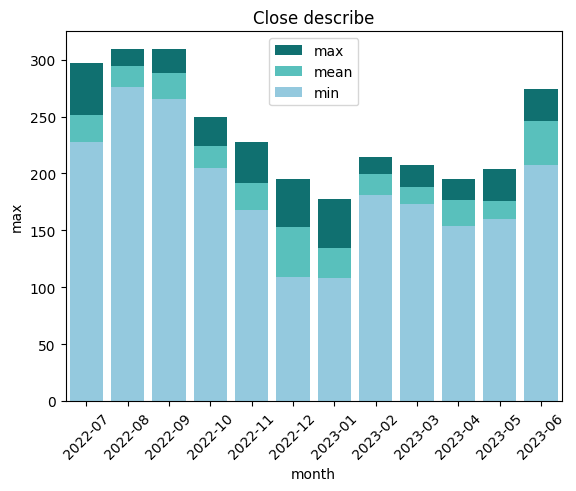

In [814]:
#close describe
plt.title('Close describe')
sns.barplot(x='month',y='max' , data = Close , color= 'teal',label = 'max')
sns.barplot(x='month',y='mean' , data = Close, color= 'mediumturquoise',label = 'mean')
sns.barplot(x='month',y='min' , data = Close , color= 'skyblue',label = 'min')
plt.xticks(rotation=45)
plt.show

In [815]:
Volume = group_month.describe()['Volume'][['max','min','mean']]

<function matplotlib.pyplot.show(close=None, block=None)>

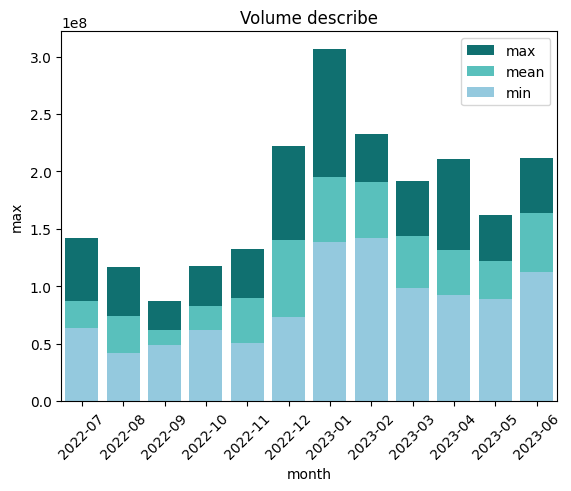

In [816]:
plt.title('Volume describe')
sns.barplot(x='month',y='max' , data = Volume , color= 'teal',label = 'max')
sns.barplot(x='month',y='mean' , data = Volume, color= 'mediumturquoise',label = 'mean')
sns.barplot(x='month',y='min' , data = Volume , color= 'skyblue',label = 'min')
plt.xticks(rotation=45)
plt.show

statistical by day of week:

In [817]:
tsla['day of week']=tsla.index.day_of_week

In [818]:
group_day=tsla.groupby('day of week')

In [819]:
tsla.head(1)

,Close,High,Low,Open,Volume,month,day of week
Date,,,,,,,
2022-07-01,227.263336,230.229996,222.119995,227.0,74460300,2022-07,4


In [820]:
group_day.describe()

Close                                                             \
            count        mean        std         min         25%         50%   
day of week                                                                    
0            44.0  212.813561  49.243820  119.769997  180.457497  194.764999   
1            52.0  209.774104  52.618777  108.099998  178.170006  197.474998   
2            52.0  210.252499  53.311669  112.709999  179.734997  201.074997   
3            51.0  211.307778  53.436359  110.339996  175.165001  202.039993   
4            52.0  212.179487  51.865976  113.059998  179.860004  201.389999   

                                     High              ...        Open  \
                    75%         max count        mean  ...         75%   
day of week                                            ...               
0            241.387501  309.320007  44.0  218.429697  ...  250.578339   
1            249.632504  308.730011  52.0  214.590450  ...  246.380001   
2            249.684998  307.396667  52.0  214.751666  ...  247.512505   
3            256.699997  308.633331  51.0  215.469149  ...  249.584999   
4            257.585007  303.350006  52.0  216.976475  ...  259.012512   

                        Volume                                          \
                    max  count          mean           std         min   
day of week                                                              
0            301.786682   44.0  1.167499e+08  4.475583e+07  41864700.0   
1            311.666656   52.0  1.213498e+08  4.729055e+07  50541800.0   
2            308.290009   52.0  1.251000e+08  4.910598e+07  50028900.0   
3            311.000000   51.0  1.234629e+08  5.365443e+07  47500500.0   
4            302.670013   52.0  1.253237e+08  5.509312e+07  50672700.0   

                                                                
                    25%          50%          75%          max  
day of week                                                     
0            91509750.0  109404750.0  144200425.0  230878800.0  
1            84275100.0  112674700.0  158915150.0  231402800.0  
2            83182725.0  125603150.0  157582300.0  221070500.0  
3            78089000.0  117798100.0  162330450.0  234815100.0  
4            78755125.0  113788250.0  162578375.0  306590600.0  

[5 rows x 40 columns]

In [821]:
Close_day = group_day.describe()['Close'][['max','min','mean']]

In [822]:
Close_day

,max,min,mean
day of week,,,
0,309.320007,119.769997,212.813561
1,308.730011,108.099998,209.774104
2,307.396667,112.709999,210.252499
3,308.633331,110.339996,211.307778
4,303.350006,113.059998,212.179487


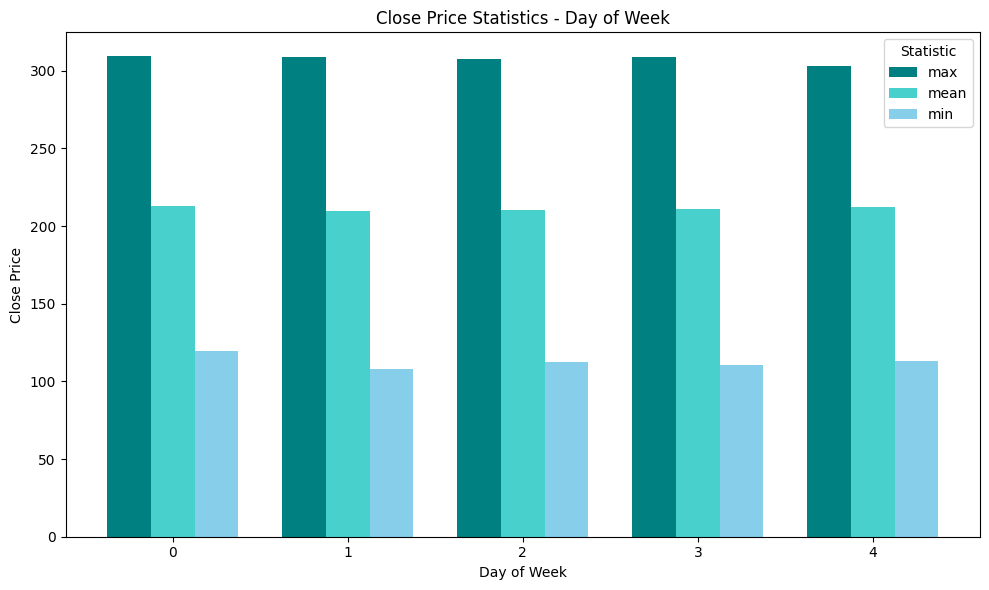

In [823]:
days = Close_day.index
max_values = Close_day['max']
mean_values = Close_day['mean']
min_values = Close_day['min']

x = np.arange(len(days))
width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x - width, max_values, width, label='max', color='teal')
plt.bar(x, mean_values, width, label='mean', color='mediumturquoise')
plt.bar(x + width, min_values, width, label='min', color='skyblue')

plt.title('Close Price Statistics - Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Close Price')
plt.legend(title='Statistic')

plt.tight_layout()
plt.show()


heatmap:

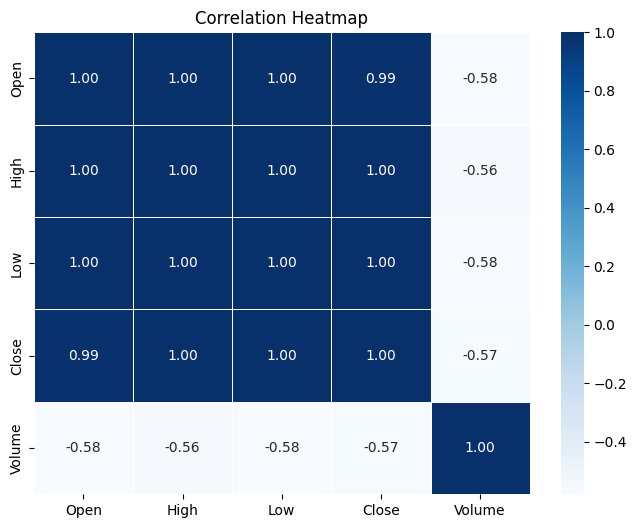

In [824]:
#correlation matrix
correlation_matrix = tsla[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='Close', ylabel='High'>

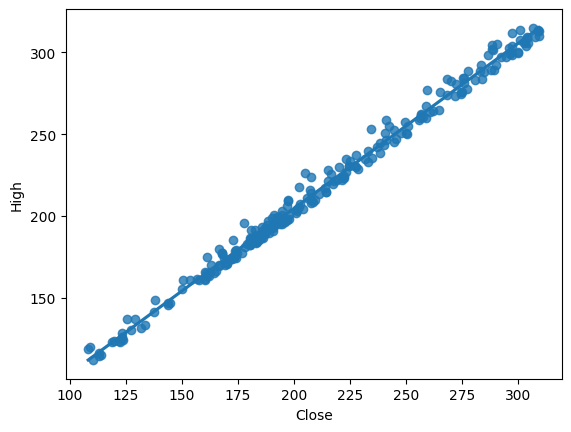

In [825]:
sns.regplot(x='Close' , y='High' , data = tsla)

<Axes: xlabel='Close', ylabel='Open'>

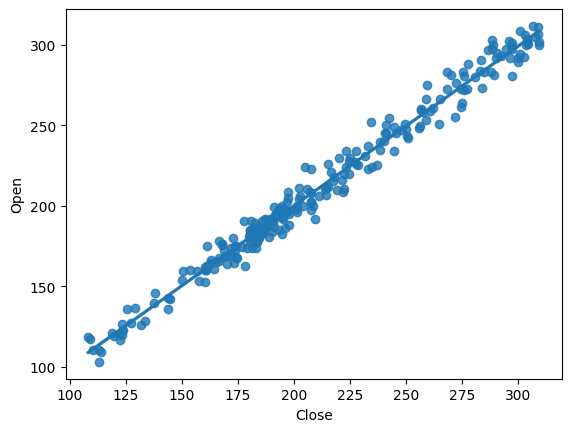

In [826]:
sns.regplot(x='Close' , y='Open' , data = tsla)

In [827]:
# נוודא שהאינדקס הוא מסוג datetime
tsla.index = pd.to_datetime(tsla.index)

# יוצרים עמודת רבעון לפי האינדקס
tsla['Quarter'] = tsla.index.to_period('Q')

# לוקחים את השורה הראשונה מכל רבעון לפי האינדקס
quarter_start = tsla.groupby('Quarter').head(1)

# מציגים את התוצאה
quarter_start[['Open', 'High', 'Low', 'Close', 'Volume']]


,Open,High,Low,Close,Volume
Date,,,,,
2022-07-01,227.000000,230.229996,222.119995,227.263336,74460300
2022-10-03,254.500000,255.160004,241.009995,242.399994,98363500
2023-01-03,118.470001,118.800003,104.639999,108.099998,231402800
2023-04-03,199.910004,202.690002,192.199997,194.770004,169545900


In [828]:
quarter_start

,Close,High,Low,Open,Volume,month,day of week,Quarter
Date,,,,,,,,
2022-07-01,227.263336,230.229996,222.119995,227.000000,74460300,2022-07,4,2022Q3
2022-10-03,242.399994,255.160004,241.009995,254.500000,98363500,2022-10,0,2022Q4
2023-01-03,108.099998,118.800003,104.639999,118.470001,231402800,2023-01,1,2023Q1
2023-04-03,194.770004,202.690002,192.199997,199.910004,169545900,2023-04,0,2023Q2


In [829]:
volum_quarter = quarter_start.Volume

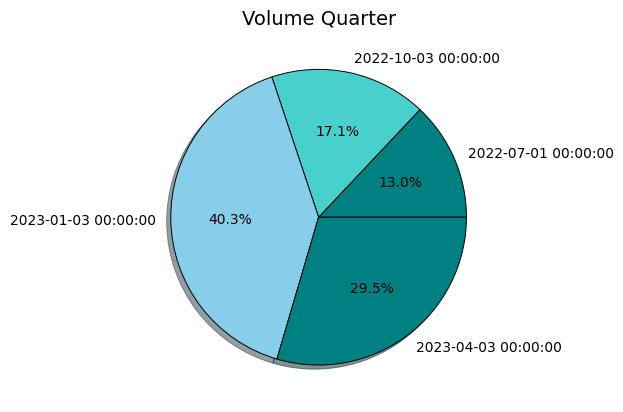

In [830]:
plt.title('Volume Quarter', fontsize=14)
plt.pie(volum_quarter,labels = volum_quarter.index,
        wedgeprops = {'edgecolor' :'k',
                      'linewidth': 0.7} ,
        shadow = True ,
        colors = ['teal', 'mediumturquoise', 'skyblue'],
       autopct='%1.1f%%',
        )

plt.show()


In [831]:
max_date=tsla['Close'].idxmax()
min_date=tsla['Close'].idxmin()
highlight_dates = [tsla['Close'].idxmax(),tsla['Close'].idxmin()]
highlight_values = tsla.loc[highlight_dates, 'Close']

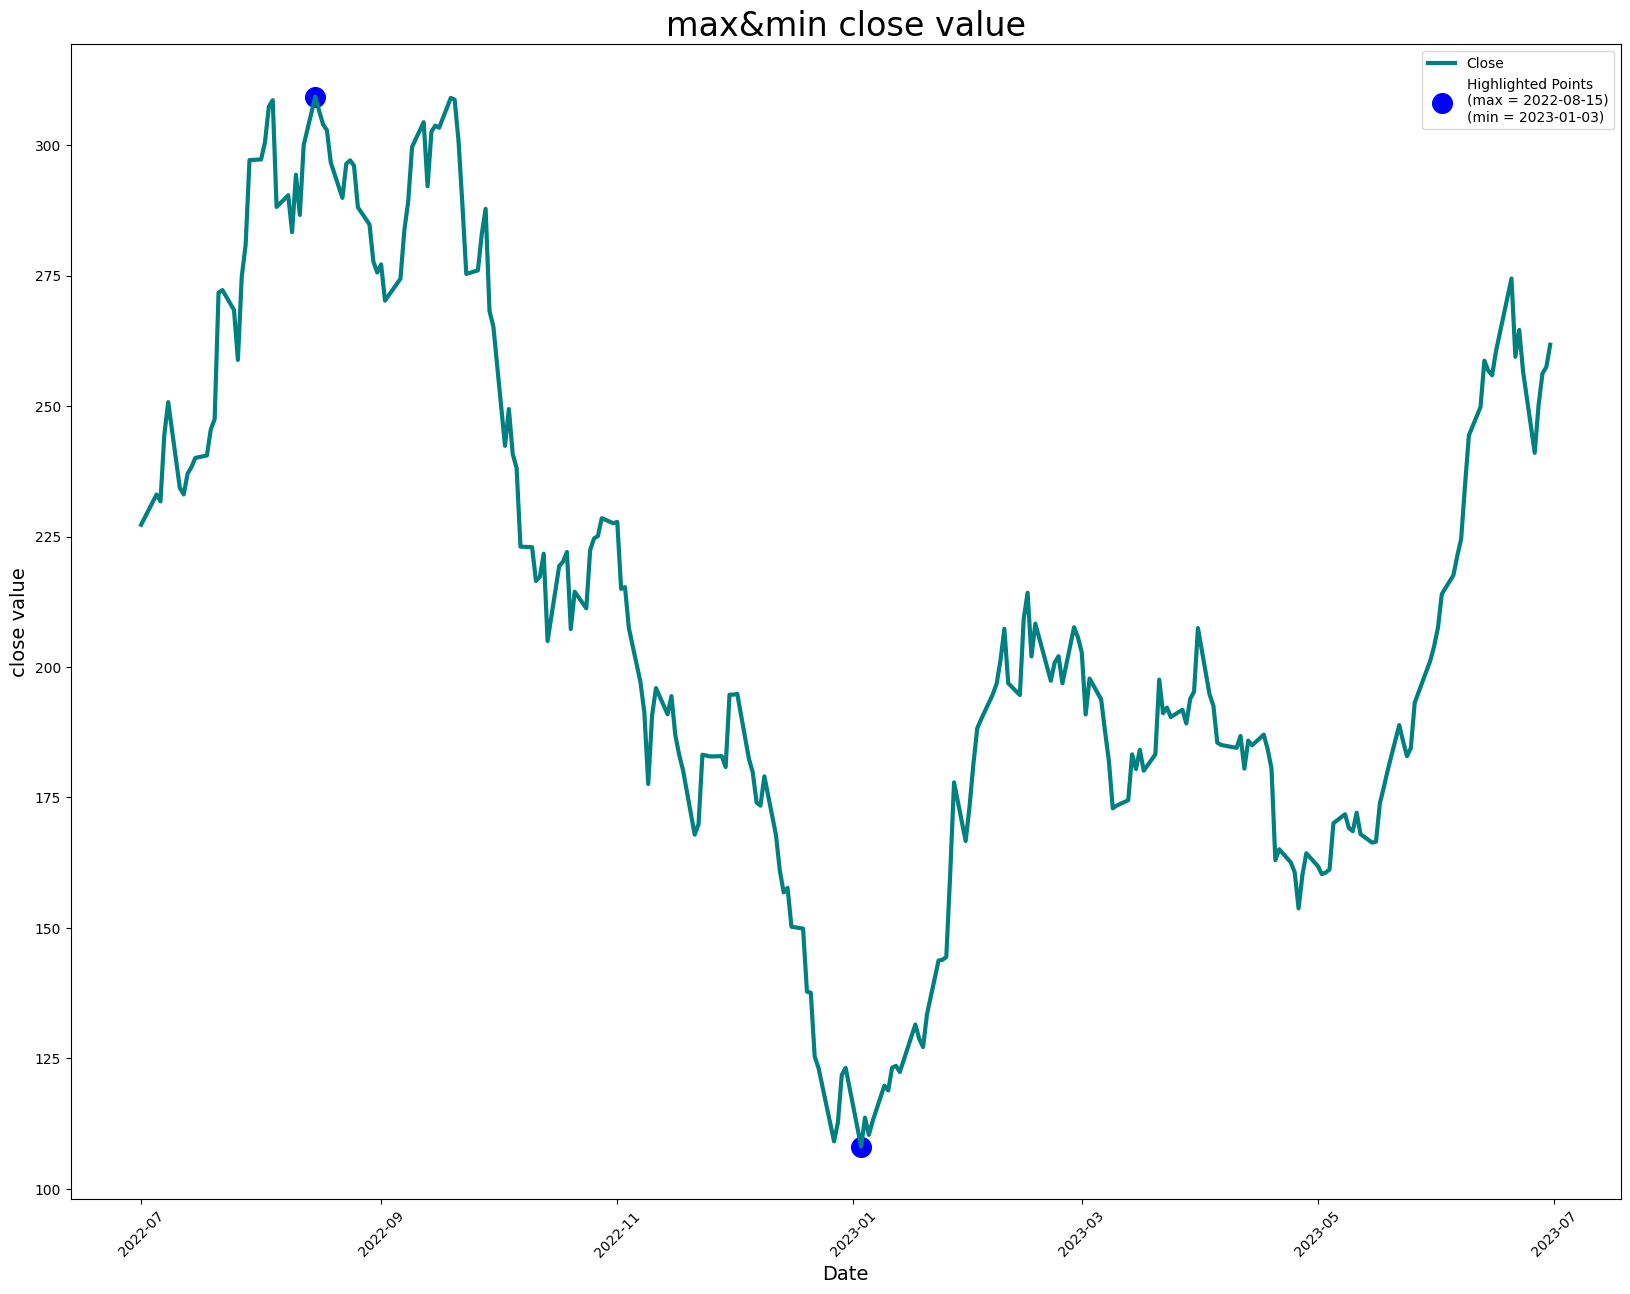

In [832]:
#
plt.subplots(figsize=(20,15))
plt.title('max&min close value',fontsize=24)
sns.lineplot(x='Date',y='Close' , data = tsla , linewidth=3, color= 'teal',label = 'Close')
plt.xlabel('Date',fontsize=14)
plt.ylabel('close value',fontsize=14)
plt.xticks(rotation=45)

plt.scatter(highlight_dates, highlight_values, color='blue', s=200,
            label=f'Highlighted Points\n(max = {max_date.date()})\n(min = {min_date.date()})')
plt.legend()
plt.show()

In [833]:
group_day.describe()['Close'][['mean']]

,mean
day of week,
0,212.813561
1,209.774104
2,210.252499
3,211.307778
4,212.179487


In [834]:
close_d_mean = group_day.describe()['Close'][['mean']]

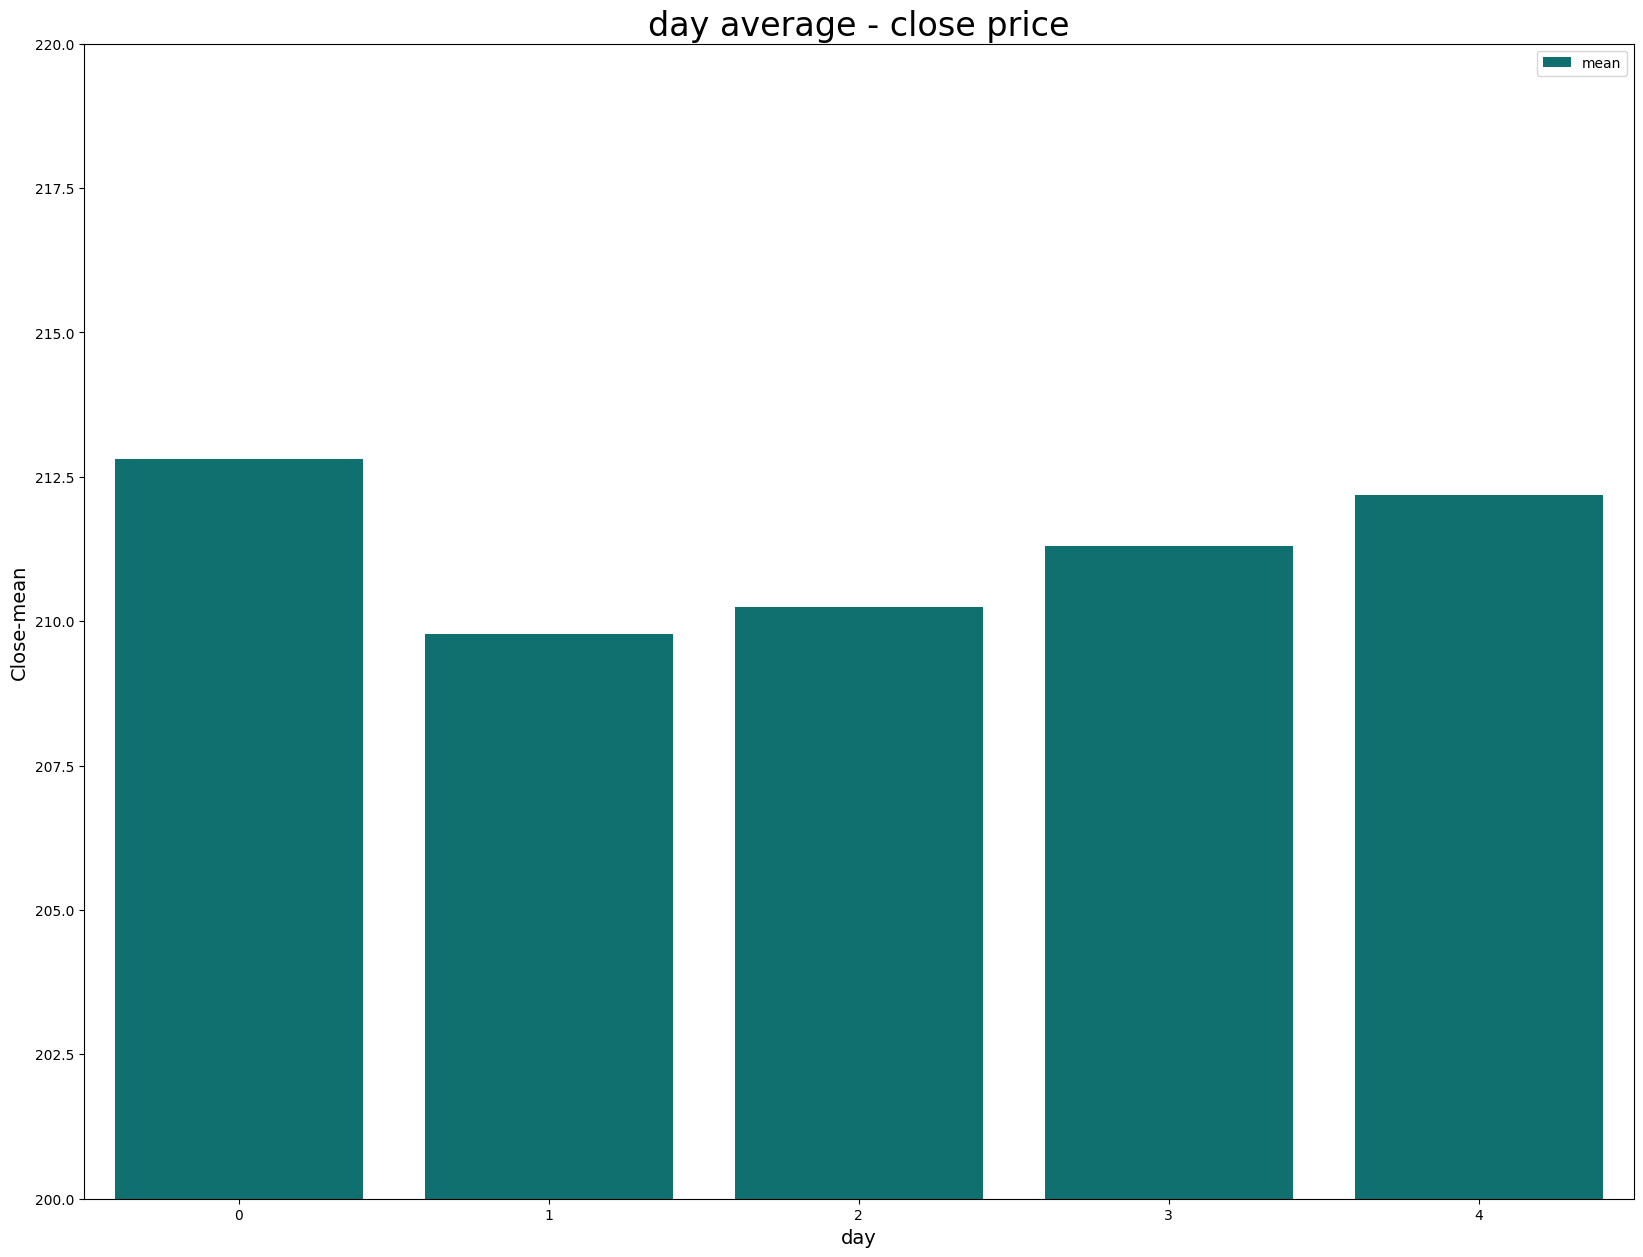

In [835]:
plt.subplots(figsize=(20,15))
plt.title('day average - close price',fontsize=24)
sns.barplot(x='day of week',y='mean' , data = close_d_mean , color= 'teal',label = 'mean')
plt.ylim(200,220)
plt.xlabel('day',fontsize=14)
plt.ylabel('Close-mean',fontsize=14)
plt.xticks(rotation=0)
plt.show()

In [836]:
close_m_mean = group_month.describe()['Close'][['mean']]

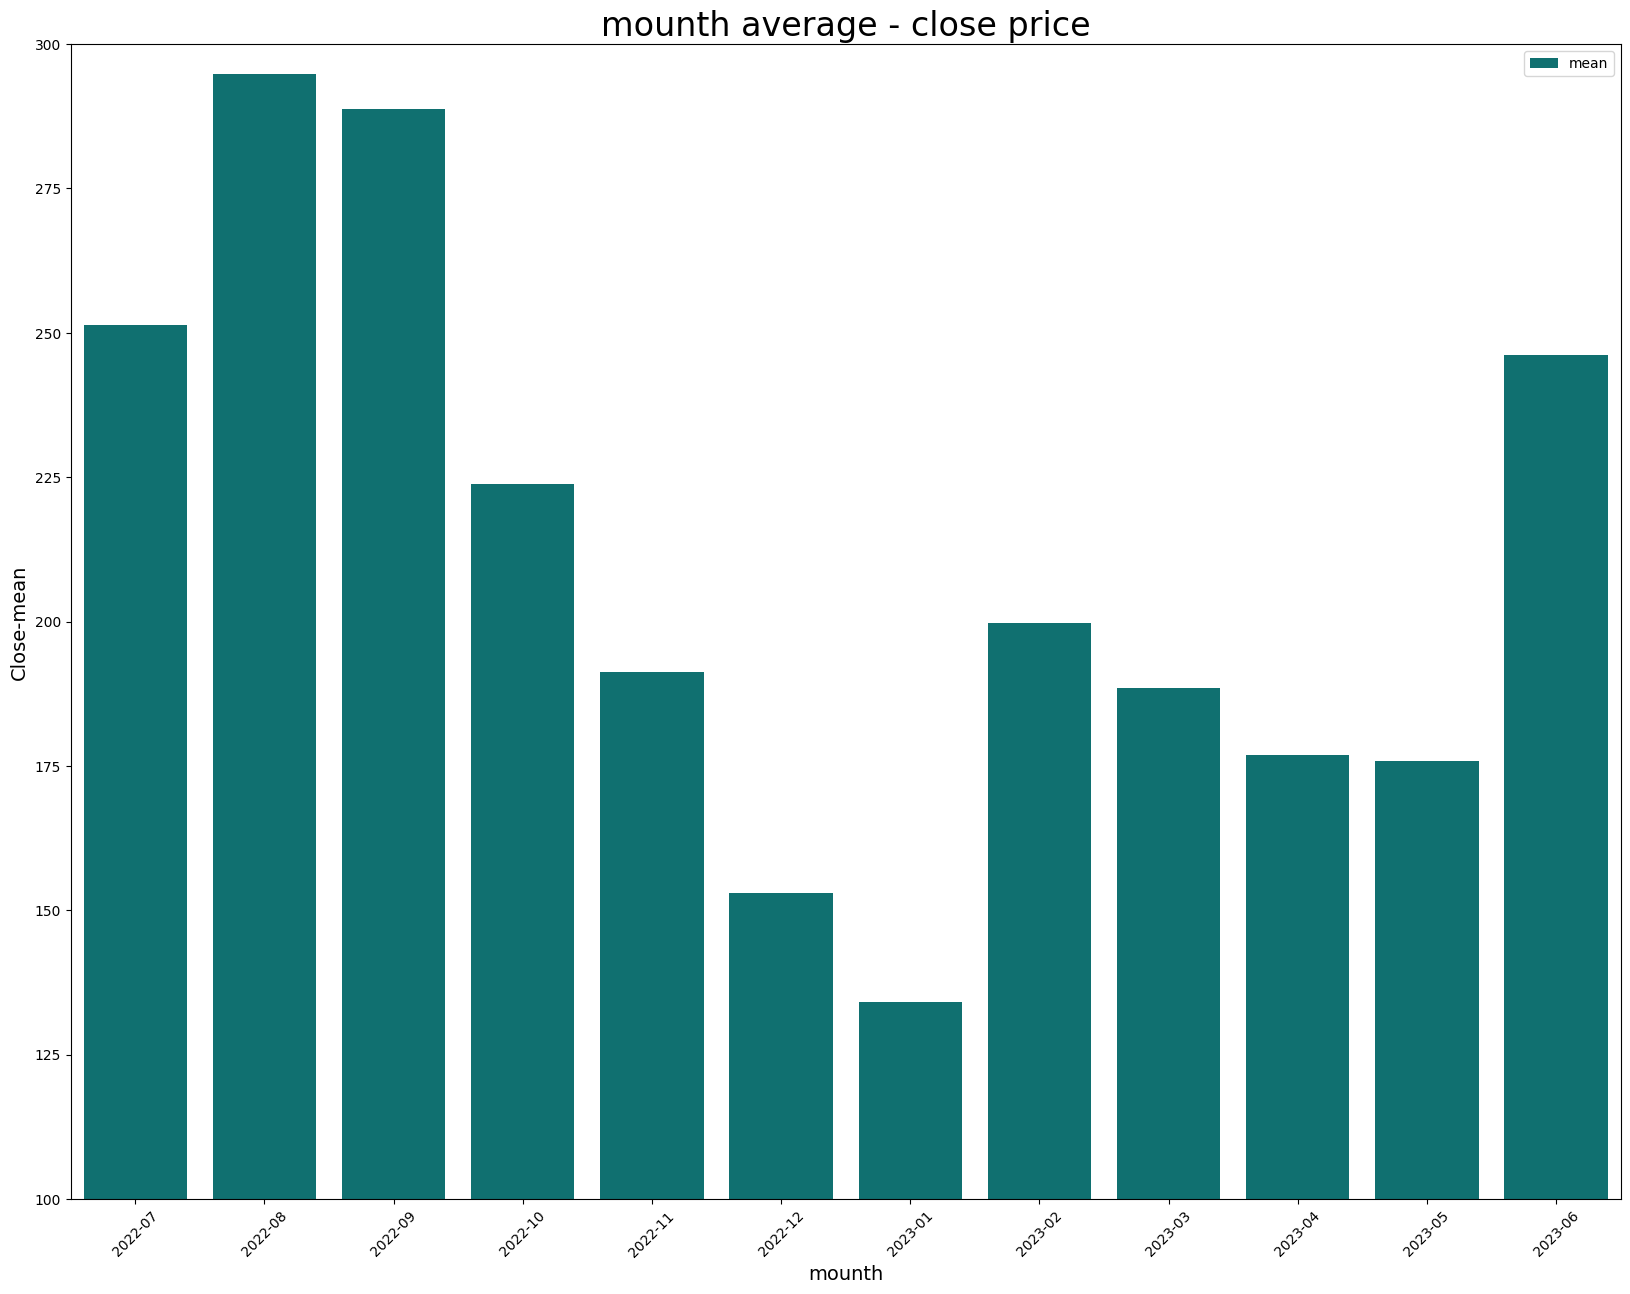

In [837]:
plt.subplots(figsize=(20,15))
plt.title('mounth average - close price',fontsize=24)
sns.barplot(x='month',y='mean' , data = close_m_mean , color= 'teal',label = 'mean')
plt.ylim(100,300)
plt.xlabel('mounth',fontsize=14)
plt.ylabel('Close-mean',fontsize=14)
plt.xticks(rotation=45)
plt.show()

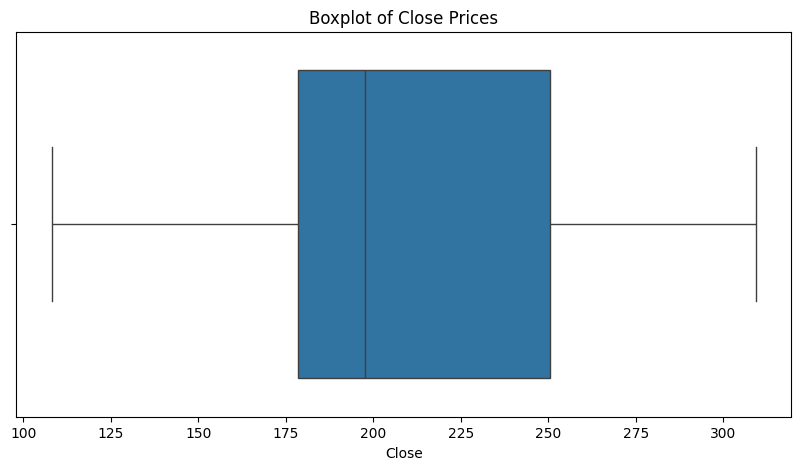

In [838]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=tsla['Close'])
plt.title("Boxplot of Close Prices")
plt.show()

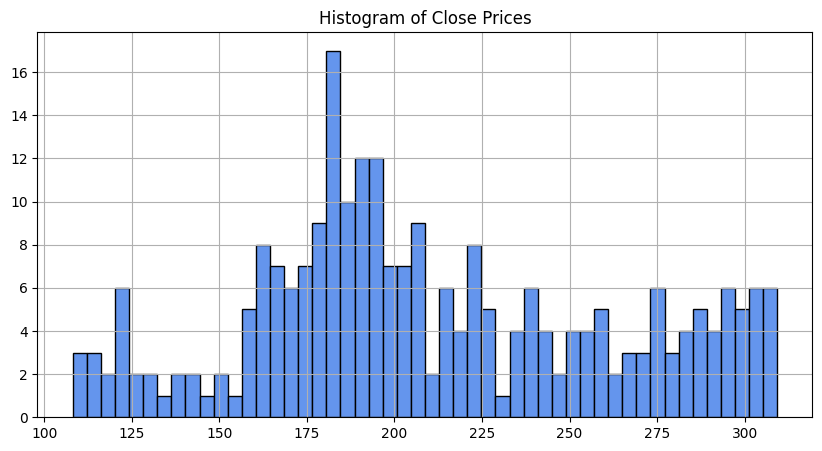

In [839]:
tsla['Close'].hist(bins=50,color='cornflowerblue', edgecolor='black', figsize=(10, 5))
plt.title("Histogram of Close Prices")
plt.show()

In [840]:
Q1 = tsla['Close'].quantile(0.25)
Q3 = tsla['Close'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = tsla[(tsla['Close'] < lower_bound) | (tsla['Close'] > upper_bound)]
print(outliers_iqr[['Close']])

Empty DataFrame
Columns: [Close]
Index: []


#Pre-Proccesoring

In [841]:
tsla.drop(['month','day of week','Quarter'],axis=1,inplace=True)

In [842]:
pd.concat([tsla["Close"],
           tsla["Close"].shift(-1),
           tsla["Close"].shift(+1)],
          keys = ["Close","tmw", "yesteday"], axis =1).head()

,Close,tmw,yesteday
Date,,,
2022-07-01,227.263336,233.066666,NaN
2022-07-05,233.066666,231.733337,227.263336
2022-07-06,231.733337,244.543335,233.066666
2022-07-07,244.543335,250.763336,231.733337
2022-07-08,250.763336,234.343338,244.543335


In [843]:
#calculating the daily change
tsla["Change"] = (tsla["Close"].shift(-1)- tsla["Close"])

In [844]:
tsla.loc[tsla["Change"] >0, "label"]= 1
tsla.loc[tsla["Change"] <0, "label"]= -1


In [845]:
tsla

,Close,High,Low,Open,Volume,Change,label
Date,,,,,,,
2022-07-01,227.263336,230.229996,222.119995,227.000000,74460300,5.803329,1.0
2022-07-05,233.066666,233.146667,216.166672,223.000000,84581100,-1.333328,-1.0
2022-07-06,231.733337,234.563339,227.186661,230.779999,71853600,12.809998,1.0
2022-07-07,244.543335,245.363327,232.210007,233.919998,81930600,6.220001,1.0
2022-07-08,250.763336,254.979996,241.160004,242.333328,101854200,-16.419998,-1.0
...,...,...,...,...,...,...,...
2023-06-26,241.050003,258.369995,240.699997,250.070007,179990600,9.160004,1.0
2023-06-27,250.210007,250.389999,240.850006,243.240005,164968200,6.029984,1.0
2023-06-28,256.239990,259.880005,248.889999,249.699997,159770800,1.260010,1.0


In [846]:
tsla = tsla.dropna(subset=['label'])

In [847]:
#Defining features , target & train , test
split_index = int(len(tsla) * 0.8)
train = tsla.iloc[:split_index]
test = tsla.iloc[split_index:]
features=['Close','High','Low','Open','Volume']
target = 'label'

In [848]:
#split train & test
X_train=train[features]
X_test=test[features]
y_train=train[target]
y_test=test[target]


#Classic models

In [849]:
#scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [850]:
#Defining models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    #"XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [851]:

# Initialize results list
results = []

# Loop over models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf = confusion_matrix(y_test, y_pred)

    # Append to results list
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1,
        "Confusion Matrix": conf
    })

In [852]:
results_df = pd.DataFrame(results).drop(columns=['Confusion Matrix'])
results_df.sort_values(by='F1-score', ascending=False)

,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.62,0.694444,0.757576,0.724638
2,Decision Tree,0.56,0.648649,0.727273,0.685714
1,Random Forest,0.38,0.545455,0.363636,0.436364
3,SVM,0.44,0.666667,0.303030,0.416667
4,KNN,0.38,0.625000,0.151515,0.243902


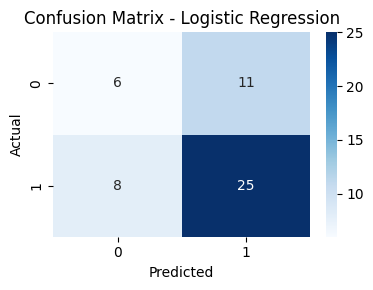

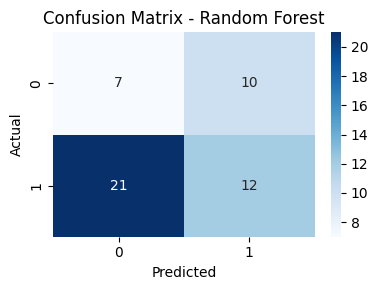

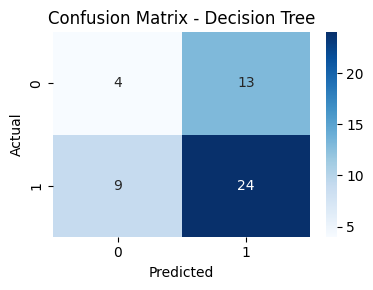

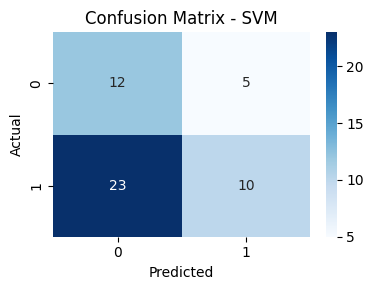

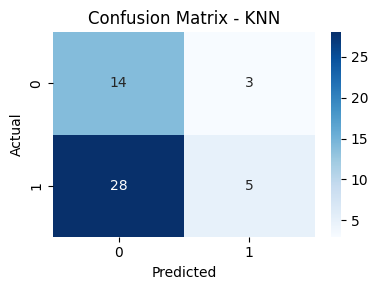

In [853]:
for result in results:
    plt.figure(figsize=(4,3))
    sns.heatmap(result['Confusion Matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {result['Model']}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

#RNN

In [854]:
Close_prices = tsla[['Close']]

In [855]:
scaler = MinMaxScaler(feature_range=(-1,1))
Close_prices['Close']=scaler.fit_transform(Close_prices[['Close']])

<ipython-input-855-74e423ad00ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Close_prices['Close']=scaler.fit_transform(Close_prices[['Close']])


In [856]:
def create_sequences(series,window_size):
  X,y = [],[]
  for i in range(len(series)-window_size):
    X.append(series[i:window_size+i])
    y.append(series[window_size+i])
  return np.array(X), np.array(y)

In [857]:
Close_prices['Close'].values

array([ 0.18440843,  0.24208987,  0.22883743,  0.35616072,  0.41798361,
        0.25477919,  0.24212308,  0.28158224,  0.2942385 ,  0.31166545,
        0.31643631,  0.36596754,  0.38554811,  0.6261471 ,  0.63148138,
        0.5936121 ,  0.4984592 ,  0.65709176,  0.71752299,  0.87903774,
        0.88029684,  0.91319613,  0.98088321,  0.99317487,  0.7897824 ,
        0.81217904,  0.74170895,  0.85127375,  0.77447568,  0.90766317,
        1.        ,  0.97260031,  0.94708942,  0.93589095,  0.87423367,
        0.80710987,  0.87211343,  0.87850783,  0.86830336,  0.78898708,
        0.75648545,  0.68571719,  0.66494364,  0.68034984,  0.6112711 ,
        0.65311607,  0.7453534 ,  0.80061627,  0.90418433,  0.95129715,
        0.82914222,  0.93330661,  0.94463764,  0.94066195,  0.99751516,
        0.99413581,  0.91531638,  0.79395676,  0.66216063,  0.66891963,
        0.73779939,  0.78620407,  0.59139237,  0.56197192,  0.33485727,
        0.40483051,  0.3190537 ,  0.29241627,  0.14272939,  0.14

In [858]:
print(X_test.shape)  # צריך להיות (num_samples, window_size)


(50, 5)


In [859]:
window_size=12
X,y=create_sequences(Close_prices['Close'].values,window_size)

In [860]:
split_time = int(len(X)*0.8)
X_train, X_test = X[:split_time], X[split_time:]
y_train, y_test = y[:split_time], y[split_time:]


In [861]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [862]:
model = tf.keras.models.Sequential([
    SimpleRNN(40,return_sequences=True),
    SimpleRNN(40),
    tf.keras.layers.Dense(1)
])

In [863]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

In [864]:
model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

In [865]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=16,
    callbacks=[early_stopping, reduce_lr]
)
y_pred = model.predict(X_test)



Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 179ms/step - loss: 0.3787 - val_loss: 0.0299 - learning_rate: 0.0010
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0798 - val_loss: 0.0573 - learning_rate: 0.0010
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0274 - val_loss: 0.0104 - learning_rate: 0.0010
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0255 - val_loss: 0.0151 - learning_rate: 0.0010
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0149 - val_loss: 0.0121 - learning_rate: 0.0010
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0148 - val_loss: 0.0085 - learning_rate: 0.0010
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0114 - val_loss: 0.0095 - learning_rate: 0.0010
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0109 - val_loss: 0.0069 - learning_rate: 0.0010
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0085 - val_loss: 0.0071 - learning_rate: 0.0010
Epoch 10

In [866]:
Close_prices

,Close
Date,
2022-07-01,0.184408
2022-07-05,0.242090
2022-07-06,0.228837
2022-07-07,0.356161
2022-07-08,0.417984
...,...
2023-06-23,0.475996
2023-06-26,0.321439
2023-06-27,0.412484


In [867]:
# מחזירים את הנתונים לסקאלה המקורית
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# יצירת ציר זמן
time_valid = Close_prices.index[split_time + window_size:]


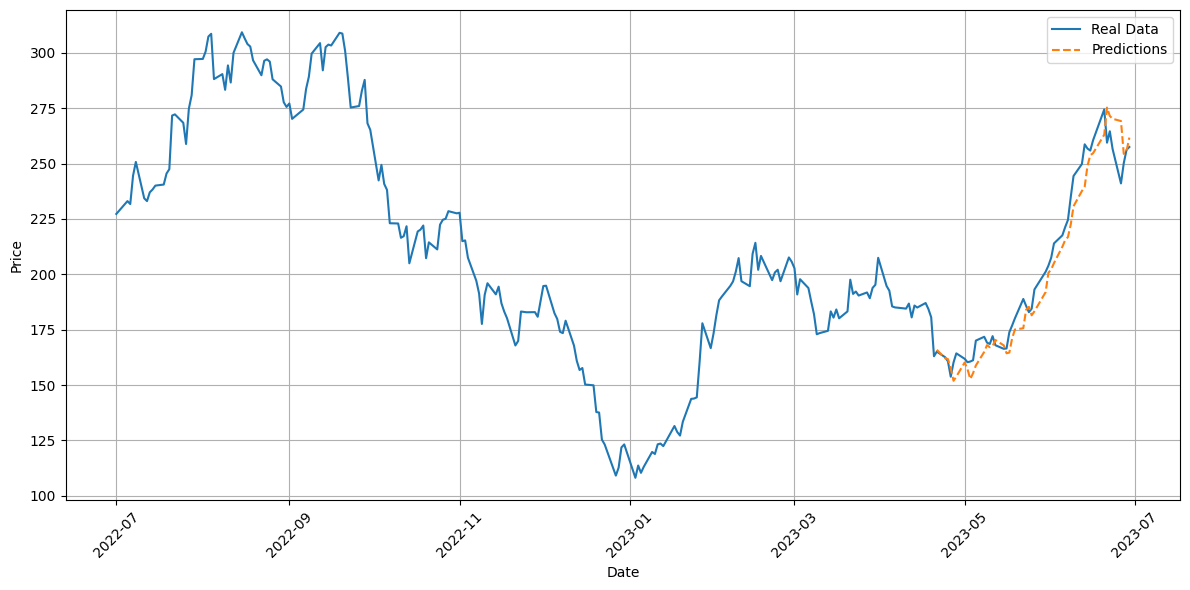

In [868]:
plt.figure(figsize=(12, 6))
plt.plot(Close_prices.index, scaler.inverse_transform(Close_prices[['Close']]), label="Real Data")
plt.plot(time_valid, y_pred, label="Predictions", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [870]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# חישוב מדדים
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


MAE: 6.84
RMSE: 8.74
R²: 0.95


#LSTM

In [647]:
Close_prices = tsla[['Close']].values

In [648]:
split_index = int(len(Close_prices)*0.8)

In [649]:
train_data = Close_prices[:split_index]
test_data=Close_prices[split_index:]

In [650]:
scaler = MinMaxScaler(feature_range=(-1, 1))
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

In [651]:
def create_sequences(data,window_size):
  X,y = [],[]
  for i in range(len(data)-window_size):
    X.append(data[i:i+window_size])
    y.append(data[i + window_size])
  return np.array(X) , np.array(y)

In [652]:
window_size = 12
X_train , y_train = create_sequences(train_scaled,window_size)
X_test,y_test = create_sequences(test_scaled,window_size)

In [653]:
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [654]:
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(window_size, 1)),
    Dropout(0.2),
    LSTM(100, return_sequences=True),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [655]:
model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

In [656]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

In [658]:
history = model.fit(
    X_train,y_train,
    validation_data=(X_test,y_test),
    epochs=100,
    batch_size=16,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 90ms/step - loss: 0.1582 - val_loss: 0.0838 - learning_rate: 0.0010
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0607 - val_loss: 0.0550 - learning_rate: 0.0010
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0501 - val_loss: 0.0562 - learning_rate: 0.0010
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0433 - val_loss: 0.0512 - learning_rate: 0.0010
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0464 - val_loss: 0.0646 - learning_rate: 0.0010
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0396 - val_loss: 0.0406 - learning_rate: 0.0010
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0383 - val_loss: 0.0456 - learning_rate: 0.0010
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0355 - val_loss: 0.0225 - learning_rate: 0.0010
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0330 - val_loss: 0.0269 - learning_rate: 0.0010
Epoch 10/

In [659]:
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


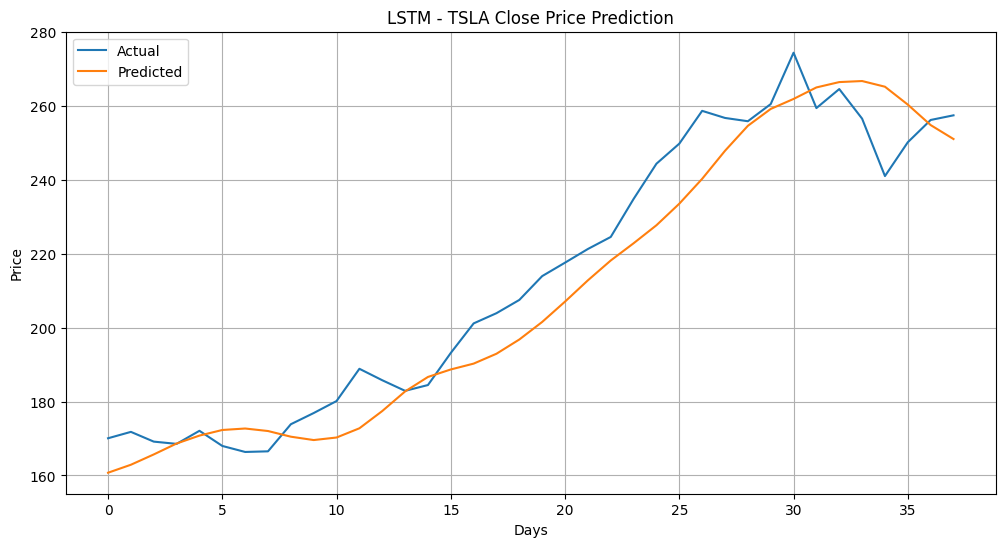

In [801]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title('LSTM - TSLA Close Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [661]:
print("Scaled y_pred range:", y_pred.min(), y_pred.max())
print("Unscaled y_pred range:", y_pred_inv.min(), y_pred_inv.max())


Scaled y_pred range: -0.4769059 0.5772145
Unscaled y_pred range: 160.7285 266.78354


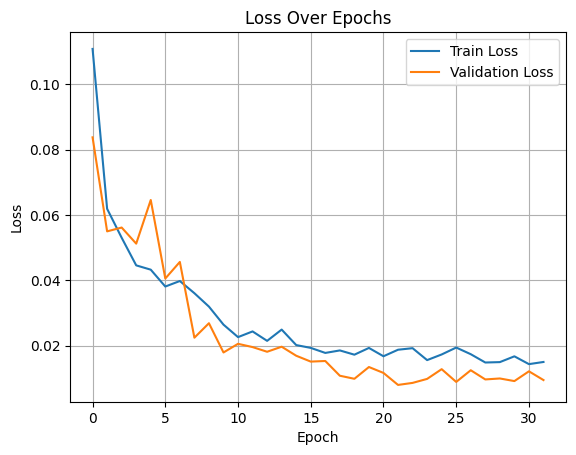

In [662]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


In [663]:
print("Training samples:", X_train.shape[0])


Training samples: 187


#GRU

In [382]:
model = Sequential([
    GRU(100, return_sequences=True, input_shape=(window_size, 1)),
    Dropout(0.2),
    GRU(100, return_sequences=True),
    Dropout(0.2),
    GRU(50),
    Dropout(0.2),
    Dense(1)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [383]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [384]:
history_gru = model.fit(
    X_train,y_train,
    validation_data=(X_test,y_test),
    epochs=50,
    batch_size=32,)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 325ms/step - loss: 0.2758 - val_loss: 0.0489
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - loss: 0.0606 - val_loss: 0.0284
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0283 - val_loss: 0.0222
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0317 - val_loss: 0.0196
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0248 - val_loss: 0.0356
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0261 - val_loss: 0.0187
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0252 - val_loss: 0.0157
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0194 - val_loss: 0.0231
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0223 - val_loss: 0.0199
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0190 - val_loss: 0.0131
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0197 - val_loss: 0.0147
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0212 - val_loss: 0.0145

In [385]:
y_pred_gru = model.predict(X_test)
y_pred_inv_gru = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step


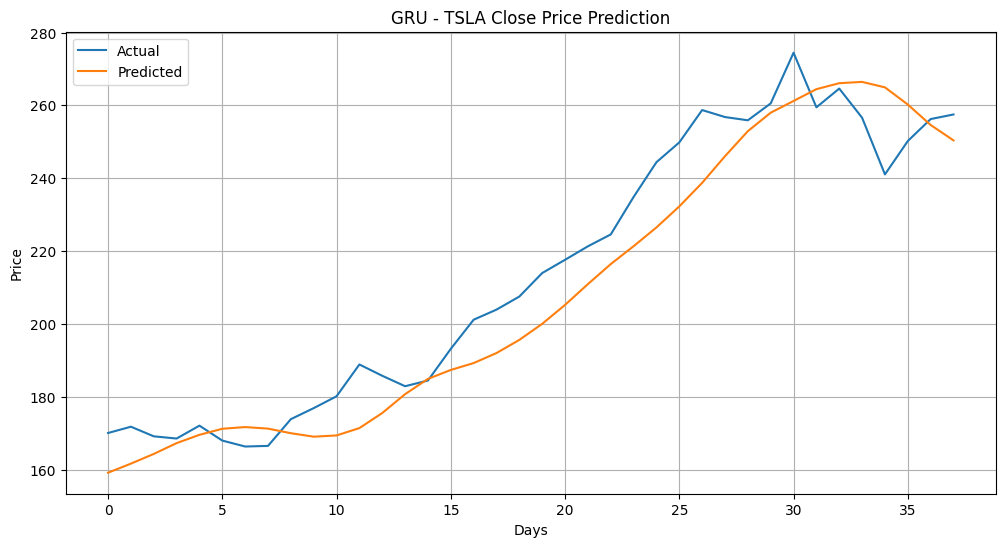

In [386]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv_gru, label='Predicted')
plt.title('GRU - TSLA Close Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()